# Historical populations by ethnicity in US and GB

Basic population stats by ethnicity in the US and GB. For the US, dates from 1610 to 2010. For Britain, a narrower historical range from 1951 to 2011.

Data are for use in conjunction with NovelTM work on starter corpora, one goal of which is to create examples balanced by historical demographics of the U.S. and U.K. Sources are cited in the notebook below.

## How to use the data

If you just want to consult the historical demographics, there are plots and tables for the U.K. (first) and U.S. (second) below. To import the data for other purposes, use the CSV files generated here and stored in the same directory as this notebook. Note that the CSVs contain percentage compositions by ethnicity and decade. Population counts would be easy to export here, but that isn't done at the moment.

In [1]:
# Imports and settings
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from   IPython.display import display

sns.set()
sns.set_context('talk')
plt.rc('figure', figsize=(12, 8))
pd.set_option("display.max_rows",1000)

gsheet_url = 'https://docs.google.com/spreadsheets/d/1Jxf5RQXRpEQhYeSlYRh6uChlyoAeb4MiYywFts3ClrE/export?format=csv&gid='
gb_sheet = '0'
us_sheet = '283907877'

gb_orig = pd.read_csv(gsheet_url + gb_sheet, usecols=range(5))
us_orig = pd.read_csv(gsheet_url + us_sheet)

## Great Britain

Data back to 1951 only. Even that far involves research beyond census data, which didn't add questions about race until later. Reading reports from the '60s, you find generalizations like "before WWII, one did not encounter blacks outside the major port cities," etc. To a first approximation, populations of non-white categories that we now recognize in GB appear to have been very small before 1950.

For sources, see the [Google Sheet](https://docs.google.com/spreadsheets/d/1Jxf5RQXRpEQhYeSlYRh6uChlyoAeb4MiYywFts3ClrE/edit#gid=0).

### By ethnicity

#### Raw populations

1951 and 1971 figures are for England and Wales. Later counts are for England only.

In [2]:
# Take a look at the data format
gb_orig.head()

,year,nation,dominant,ethnicity,population
0,2011,england,True,white,45281142
1,2011,england,False,multiple,1192879
2,2011,england,False,south_asian,4143403
3,2011,england,False,black,1846614
4,2011,england,False,other,548418


`'Dominant'` means, in practice, white vs. all other categories in all cases.

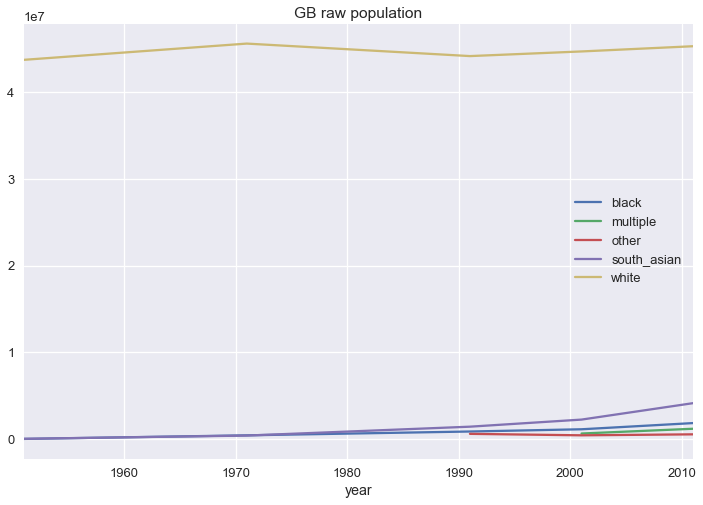

In [3]:
# Plot raw populations
fig, ax = plt.subplots()
for key, group in gb_orig.groupby('ethnicity'):
    group.groupby('year').population.sum().plot(ax=ax, kind='line', x='year', y='population', label=key)
plt.legend()
plt.title('GB raw population')
plt.show()

#### Fractions of total population

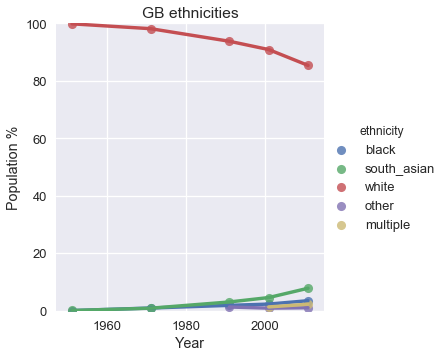

population
year ethnicity              
1951 black               0.0
     south_asian         0.1
     white              99.9
1971 black               0.9
     south_asian         0.9
     white              98.2
1991 black               1.9
     other               1.3
     south_asian         3.0
     white              93.8
2001 black               2.3
     multiple            1.3
     other               0.9
     south_asian         4.6
     white              90.9
2011 black               3.5
     multiple            2.3
     other               1.0
     south_asian         7.8
     white              85.4

In [4]:
# Calculate percentages by year and ethnicity
gb_year_eth = gb_orig.groupby(['year', 'ethnicity']).agg({'population':'sum'})
gb_pcts = gb_year_eth.groupby(level=0).apply(lambda x: 100*x/x.sum())
gb_pcts.to_csv('gb_ethnicities.csv')

# Plot
fig = sns.lmplot(data=gb_pcts.reset_index(), x='year', y='population', 
                 hue='ethnicity', lowess=True)
fig = fig.set_axis_labels('Year', 'Population %').set(ylim=(0,100), title='GB ethnicities')
plt.show()

# Display table
display(round(gb_pcts,1))

### By non/dominant

#### Fractions of total population

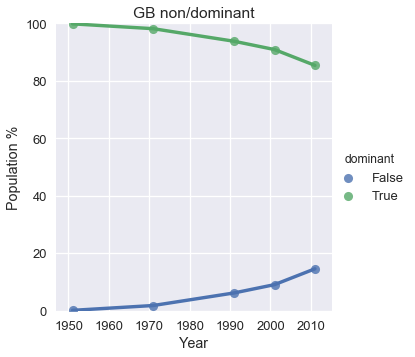

population
year dominant            
1951 False            0.1
     True            99.9
1971 False            1.8
     True            98.2
1991 False            6.2
     True            93.8
2001 False            9.1
     True            90.9
2011 False           14.6
     True            85.4

In [5]:
# Calculate percentages by year and ethnicity
gb_year_dom = gb_orig.groupby(['year', 'dominant']).agg({'population':'sum'})
gb_pcts_dom = gb_year_dom.groupby(level=0).apply(lambda x: 100*x/x.sum())
gb_pcts_dom.to_csv('gb_dominants.csv')

# Plot
fig = sns.lmplot(data=gb_pcts_dom.reset_index(), x='year', y='population', 
                 hue='dominant', lowess=True)
fig = fig.set_axis_labels('Year', 'Population %').set(ylim=(0,100), title='GB non/dominant')
plt.show()

# Display table
display(round(gb_pcts_dom,1))

## United States

Data here go *way* back, to 1610, though I generally only show 1790 or 1800+ for brevity and clarity. Data for all dates are in the CSV. Sourced from US Census Bureau via [Wikipedia](https://en.wikipedia.org/wiki/Historical_racial_and_ethnic_demographics_of_the_United_States).

Counts are complicated by overlapping treatment of race and ethnicity with respect to hispanic origin. In principle, the Census Bureau doesn't recognize "Hispanic" (or "Middle Eastern", FWIW) as a racial category. All respondents are supposed to choose a race from the existing list ("white," "black," "asian," "native american," etc.) and then, separately, answer a yes/no question, "are you of hispanic origin?" [In practice](https://www2.census.gov/cac/nac/meetings/2016-10/2016-nac-jones.pdf), lots of people don't find this an accurate description of their identity. Future censuses may [change their questions](https://www.census.gov/about/our-research/race-ethnicity.html) to more closely match contemporary identity categories.

But for now, we're stuck. If we think that "hispanic" *is* a meaningful category we'd like to reflect in our corpora, we don't have it as a distinct count within the U.S. population. What we do have are categories of "white," "nonhispanic white," and "hispanic any." Census Bureau research (see links above) suggests that people who would choose "hispanic" alone as their racial identity if it were an option disproportionatley choose "some other race" in current forms. But I don't see an especially satisfactory way of trying to back-solve for intentions where the data were generated on other principles.

So, here's how it's (currently) treated in the final analysis, subject to revision:

* Existing categories are:
    * `white`
    * `black`
    * `native`
    * `asian`
    * `other` (from 1950)
    * `multiple` (from 2000)
    * `hispanic any` (from 1850, with gaps; overlaps all other categories)
    * `nonhispanic white` (from 1850, with gaps)
* Use `white`, `black`, `native`, `asian`, `other`, and `multiple` population counts as-is
* Treat `hispanic any` as if it were a distinct category
* Calculate population percentages on the basis of the 7 resulting categories (black, native, asian, other, multiple, hispanic, white).

Note that this procedure overcounts people of hispanic origin, since many are also counted as members of the other categories (although the USCB reports that there is significant -- c. 30%? -- refusal to answer the race question among those who identify as hispanic). All other categories are, therefore, undercounted, since the calculated population base is larger due to double counting of hispanic origin. This issue amounts no more than a single percentage point deviation from the official census counts across the board (assuming we compare the `white` count here to the `nonsipanic white` count from the census). My sense is that this is good enough for our purposes.

### By ethnicity

#### Raw populations

In [6]:
# Look at input data
us_orig.head()

,ethnicity,1610,1620,1630,1640,1650,1660,1670,1680,1690,...,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
0,total,350.0,2302.0,4646.0,26634.0,50368.0,75058.0,111935.0,151507.0,210372.0,...,105710620.0,122775046.0,131669275.0,150697361.0,179323175.0,203210158.0,226545805.0,248709873.0,281421906,308745538
1,white,350.0,2282.0,4586.0,26037.0,48768.0,72138.0,107400.0,144536.0,193643.0,...,94820915.0,110286740.0,118214870.0,134942028.0,158831732.0,178119221.0,188371622.0,199686070.0,211460626,223553265
2,black,0.0,20.0,60.0,597.0,1600.0,2920.0,4535.0,6971.0,16729.0,...,10463131.0,11891143.0,12865518.0,15042286.0,18871831.0,22539362.0,26495025.0,29986060.0,34658190,38929319
3,native,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,244437.0,332397.0,333969.0,343410.0,551669.0,795110.0,1420400.0,1959234.0,2475956,2932248
4,asian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,182137.0,264766.0,254918.0,321033.0,980337.0,1526401.0,3500439.0,7273662.0,10641833,15214265


In [7]:
# Transform wide to long format
us = pd.melt(us_orig, id_vars=['ethnicity'], var_name='year', value_name='population')
us.year = pd.to_numeric(us.year)
us.head()

,ethnicity,year,population
0,total,1610,350.0
1,white,1610,350.0
2,black,1610,0.0
3,native,1610,NaN
4,asian,1610,NaN


Counts for hispanic populations are available as far back as 1850, but there are some gap years along the way. Fill those few with linear interpolations.

In [8]:
# Fill gaps in data for hispanic counts
us[us.ethnicity=='hispanic_any'] = us[us.ethnicity=='hispanic_any'].interpolate(limit=2)
us[us.ethnicity=='nonhispanic_white'] = us[us.ethnicity=='nonhispanic_white'].interpolate(limit=2)

NB. US data include a 'total' number as an entry for each census year. Leave that one out so we can see just the constituent populations.

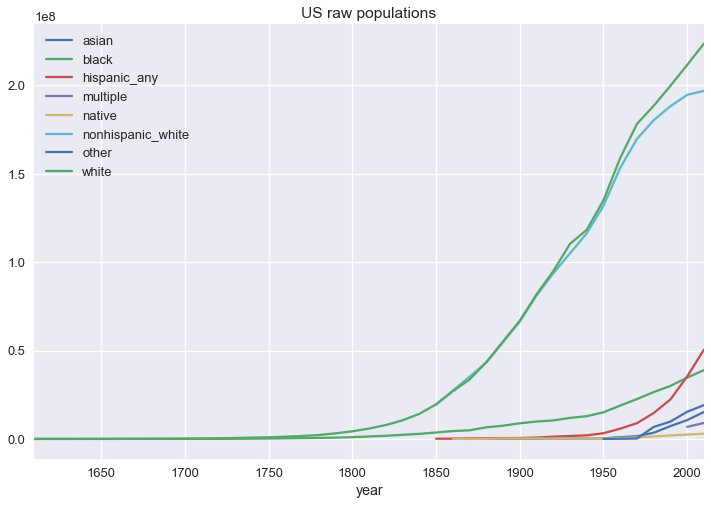

In [9]:
# Plot raw populations w/o total
fig, ax = plt.subplots()
for key, group in us[~us.ethnicity.isin(['total'])].groupby('ethnicity'):
    group.groupby('year').population.sum().plot(ax=ax, kind='line', x='year', y='population', label=key)
plt.legend()
plt.title('US raw populations')
plt.show()

#### Percentages

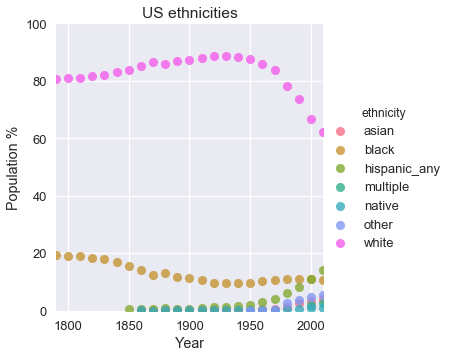

,year,ethnicity,population
134,1800,black,18.9
139,1800,white,81.1
141,1810,black,19.0
146,1810,white,81.0
148,1820,black,18.4
153,1820,white,81.6
155,1830,black,18.1
160,1830,white,81.9
162,1840,black,16.8
167,1840,white,83.2


In [10]:
# Calculate percentages by year and ethnicity
us_year_eth = us[~us.ethnicity.isin(['total', 'nonhispanic_white'])].groupby(['year', 'ethnicity']).agg({'population':'sum'})
us_pcts = us_year_eth.groupby(level=0).apply(lambda x: 100*x/x.sum())
us_pcts.reset_index(inplace=True)
us_pcts.year = pd.to_numeric(us_pcts.year)
us_pcts.to_csv('us_ethnicities.csv')

# Plot
fig = sns.lmplot(data=us_pcts, x='year', y='population', 
                 hue='ethnicity', fit_reg=False)
fig = fig.set_axis_labels('Year', 'Population %').set(xlim=(1790,2010), ylim=(0,100), 
                                                      title='US ethnicities')
plt.show()

# Display percentages by year and ethnicity (only populations >= 1%)
display(round(us_pcts[(us_pcts.year>=1800) & (us_pcts.population>=1)],1))

### By non/dominant

#### By percentage

In [11]:
# Set dominance class
us['dominant'] = False
us.dominant.loc[us.ethnicity.isin(['white', 'nonhispanic_white'])] = True

/Users/mwilkens/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


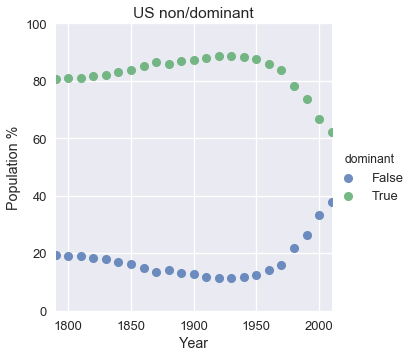

,year,dominant,population
38,1800,False,18.9
39,1800,True,81.1
40,1810,False,19.0
41,1810,True,81.0
42,1820,False,18.4
43,1820,True,81.6
44,1830,False,18.1
45,1830,True,81.9
46,1840,False,16.8
47,1840,True,83.2


In [13]:
# Calculate percentages by year and ethnicity
us_year_dom = us[~us.ethnicity.isin(['total', 'nonhispanic_white'])].groupby(['year', 'dominant']).agg({'population':'sum'})
us_pcts_dom = us_year_dom.groupby(level=0).apply(lambda x: 100*x/x.sum())
us_pcts_dom.reset_index(inplace=True)
us_pcts_dom.year = pd.to_numeric(us_pcts_dom.year)
fig = sns.lmplot(data=us_pcts_dom, x='year', y='population', 
                 hue='dominant', fit_reg=False)
fig = fig.set_axis_labels('Year', 'Population %').set(xlim=(1790,2010), ylim=(0,100), 
                                                      title='US non/dominant')
plt.show()
us_pcts_dom.to_csv('us_dominants.csv')
display(round(us_pcts_dom[us_pcts_dom.year>=1800],1))